In [1]:
import numpy as np
import pandas 
import pandas as pd
#1 Загрузите выборку из файла titanic.csv с помощью пакета Pandas.
data = pandas.read_csv('titanic.csv', index_col='PassengerId')
data[:2]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [2]:
#2 Оставьте в выборке четыре признака: 
#класс пассажира (Pclass), цену билета (Fare), возраст пассажира (Age) и его пол (Sex).
#data1 = data[['Pclass','Fare','Age','Sex']]
#data1[:2]


#data2 = data.loc[:,'Pclass':'Fare']
data2 = data.loc[:,'Survived':'Fare']
data2 = data2.drop('Name', axis=1)
data2 = data2.drop('SibSp', axis=1)
data2 = data2.drop('Parch', axis=1)
data2 = data2.drop('Ticket', axis=1)
data2[:2]

,Survived,Pclass,Sex,Age,Fare
PassengerId,,,,,
1,0,3,male,22.0,7.2500
2,1,1,female,38.0,71.2833


In [3]:
# 3 Обратите внимание, что признак Sex имеет строковые значения.
#df['B'] = df1['E'].values
#w = data1.loc[:,'Sex']
#w[:2]
#w.replace(['male', 'female'], [1, 0], inplace=True)
data2.replace(['male', 'female'], [1, 0], inplace=True)

In [4]:
# my data
data2[:8]

,Survived,Pclass,Sex,Age,Fare
PassengerId,,,,,
1,0,3,1,22.0,7.2500
2,1,1,0,38.0,71.2833
3,1,3,0,26.0,7.9250
4,1,1,0,35.0,53.1000
5,0,3,1,35.0,8.0500
6,0,3,1,NaN,8.4583
7,0,1,1,54.0,51.8625
8,0,3,1,2.0,21.0750


In [5]:
# 5 В данных есть пропущенные значения — например, для некоторых пассажиров неизвестен их возраст.
# Такие записи при чтении их в pandas принимают значение nan. 
# Найдите все объекты, у которых есть пропущенные признаки, и удалите их из выборки
data3 = data2[np.isfinite(data2['Age'])]
data3[:8]

,Survived,Pclass,Sex,Age,Fare
PassengerId,,,,,
1,0,3,1,22.0,7.2500
2,1,1,0,38.0,71.2833
3,1,3,0,26.0,7.9250
4,1,1,0,35.0,53.1000
5,0,3,1,35.0,8.0500
7,0,1,1,54.0,51.8625
8,0,3,1,2.0,21.0750
9,1,3,0,27.0,11.1333


In [6]:
# 4 Выделите целевую переменную — она записана в столбце Survived.
# my target: Survived
targ = data3.loc[:,'Survived']
targ[:8]

PassengerId
1    0
2    1
3    1
4    1
5    0
7    0
8    0
9    1
Name: Survived, dtype: int64

In [7]:
#remove survived from attributes:
data3 = data3.drop('Survived', axis=1)

In [8]:
data3[:7]

,Pclass,Sex,Age,Fare
PassengerId,,,,
1,3,1,22.0,7.2500
2,1,0,38.0,71.2833
3,3,0,26.0,7.9250
4,1,0,35.0,53.1000
5,3,1,35.0,8.0500
7,1,1,54.0,51.8625
8,3,1,2.0,21.0750


In [9]:
# 6 Обучите решающее дерево с параметром random_state=241 и остальными параметрами по умолчанию 
# (речь идет о параметрах конструктора DecisionTreeСlassifier).
from sklearn.tree import DecisionTreeClassifier
#class_weight=None, criterion='gini', max_depth=None,
           # max_features=None, max_leaf_nodes=None,
           # min_impurity_decrease=0.0, min_impurity_split=None,
           # min_samples_leaf=1, min_samples_split=2,
           # min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           # splitter='best'
clf = DecisionTreeClassifier(random_state=241)
clf.fit(data3, targ)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=241,
            splitter='best')

In [10]:
# 7 Вычислите важности признаков и найдите два признака с наибольшей важностью. 
importances = clf.feature_importances_
print (importances)

[0.14000522 0.30051221 0.2560461  0.30343647]


In [11]:
#print (data3)
# Pclass  Sex   Age      Fare

In [12]:
indices = np.argsort(importances)[::-1]
print (indices)

[3 1 2 0]


In [13]:
#right answer: Fare:0.30343647 and Sex: 0.30051221

In [14]:
# Print the feature ranking
print("Feature ranking:")

for f in range(data3.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 3 (0.303436)
2. feature 1 (0.300512)
3. feature 2 (0.256046)
4. feature 0 (0.140005)


In [15]:
clf.classes_

array([0, 1])

In [16]:
########## visualization

In [17]:
import matplotlib.pyplot as plt

In [26]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
# Build a classification task using 3 informative features
data3, targ = make_classification(n_samples=1000,
                           n_features=4,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=241,
                           shuffle=False)
clf1 = ExtraTreesClassifier(n_estimators=250,random_state=241)
clf1.fit(data3, targ)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=1,
           oob_score=False, random_state=241, verbose=0, warm_start=False)

In [24]:
#DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
 #           max_features=None, max_leaf_nodes=None,
  #          min_impurity_decrease=0.0, min_impurity_split=None,
   #         min_samples_leaf=1, min_samples_split=2,
    #        min_weight_fraction_leaf=0.0, presort=False, random_state=241,
     #       splitter='best')

In [28]:
importances1 = clf1.feature_importances_
print (importances1)
# wo classif
#[0.12652178 0.29988499 0.30327415 0.27031907]
#w classifier: 
#[0.05956957 0.83603772 0.05644836 0.04794435]
#+n_estimators:
#[0.06303794 0.82934546 0.05479755 0.05281906]

[0.06303794 0.82934546 0.05479755 0.05281906]


In [21]:
print (importances)

[0.14000522 0.30051221 0.2560461  0.30343647]


In [29]:
std = np.std([tree.feature_importances_ for tree in clf1.estimators_],
             axis=0)
indices1 = np.argsort(importances1)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(data3.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices1[f], importances1[indices1[f]]))

Feature ranking:
1. feature 1 (0.829345)
2. feature 0 (0.063038)
3. feature 2 (0.054798)
4. feature 3 (0.052819)


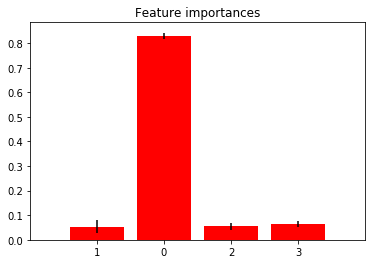

In [31]:
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(data3.shape[1]), importances1[indices],
       color="r", yerr=std[indices1], align="center")
plt.xticks(range(data3.shape[1]), indices1)
plt.xlim([-1, data3.shape[1]])
plt.show()
# Pclass  Sex   Age      Fare
#   0      1     2      3